<a href="https://colab.research.google.com/github/anton-akulenko/HW02-DS/blob/main/DS_HW_06_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import kmeans_plusplus, KMeans
from sklearn.decomposition import PCA

from google.colab import drive

In [2]:
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
all_data_folder = "/content/drive/MyDrive/tests_colab/data_mod6/"

In [ ]:
df_2d = pd.read_csv(all_data_folder + "data_2d.csv")
df_2d.head()


In [ ]:
# df_2d.insert(0, ["X", "Y", "Z"])
df_2d.columns=["x", "y", "z"]
df_2d.head()

In [ ]:
df_mnist = pd.read_csv(all_data_folder + "mnist.csv")
df_mnist.head()

In [ ]:
df_2d.shape, df_mnist.shape

K-means

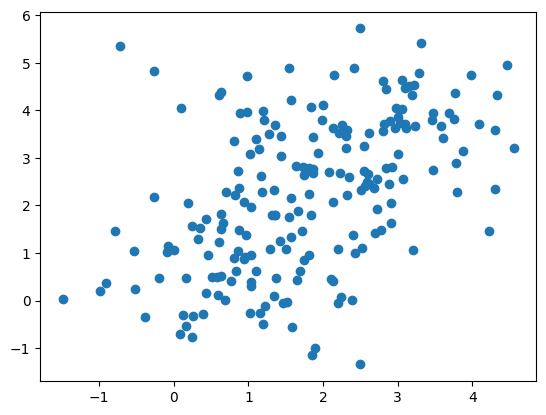

In [8]:
plt.scatter(df_2d['y'],	df_2d['z'])
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(df_2d)

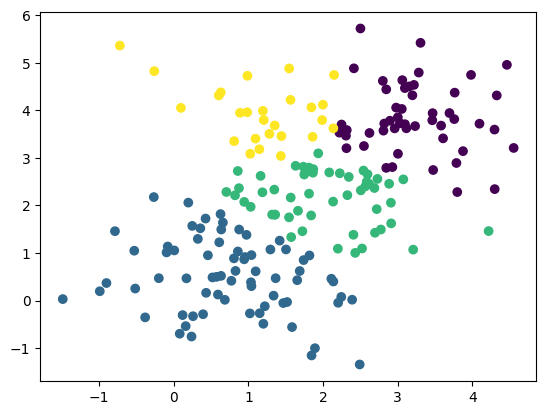

In [10]:
plt.scatter(df_2d['y'],	df_2d['z'], c=kmeans.labels_)
plt.show()

Elbow method

In [11]:
def kmeans_elbow(data):
    distortion = []
    r = range(1, 15)
    for i in r:
        kmean = KMeans(n_clusters=i, n_init=10).fit(data)
        distortion.append(kmean.inertia_)
    plt.plot(r, distortion)
    plt.grid()
    plt.show()

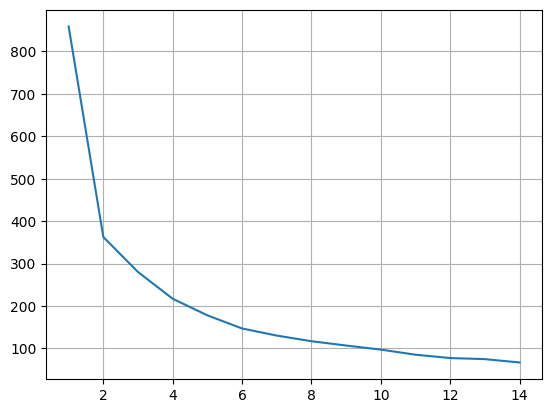

In [12]:
kmeans_elbow(df_2d)


In [ ]:
kmean = KMeans(n_clusters=6, n_init=10).fit(df_2d)
cluster_assignments = kmean.labels_
cluster_centers = kmean.cluster_centers_

print("Cluster Assignments:", cluster_assignments)
print("Cluster Centers:", cluster_centers)
kmean.inertia_

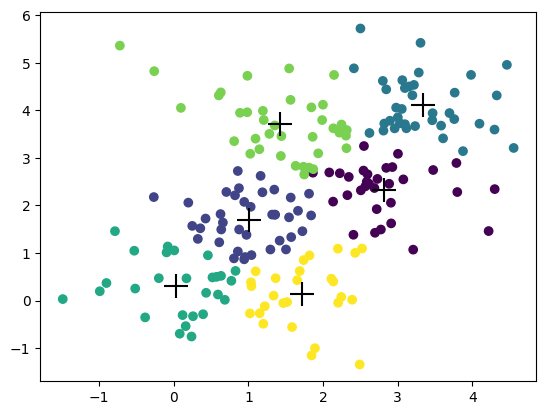

In [14]:
plt.scatter(df_2d['y'],	df_2d['z'], c=kmean.labels_)
plt.scatter(cluster_centers[:,1:2], cluster_centers[:,2:], marker='+', c='k', s=300)
plt.show()

In [ ]:
pca_2d = PCA(n_components=2, tol=0.0001).fit_transform(df_mnist)
pca_df_2d = pd.DataFrame(pca_2d)
pca_df_2d

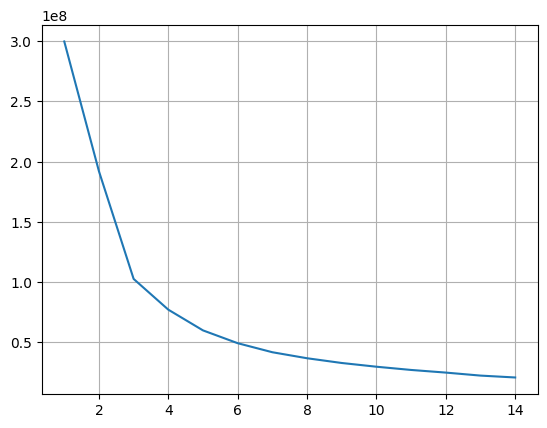

In [16]:
kmeans_elbow(pca_df_2d)


In [ ]:
kmean = KMeans(n_clusters=6, n_init=10).fit(pca_df_2d)
cluster_assignments = kmean.labels_
cluster_centers = kmean.cluster_centers_

print("Cluster Assignments:", cluster_assignments)
print("Cluster Centers:", cluster_centers)
kmean.inertia_

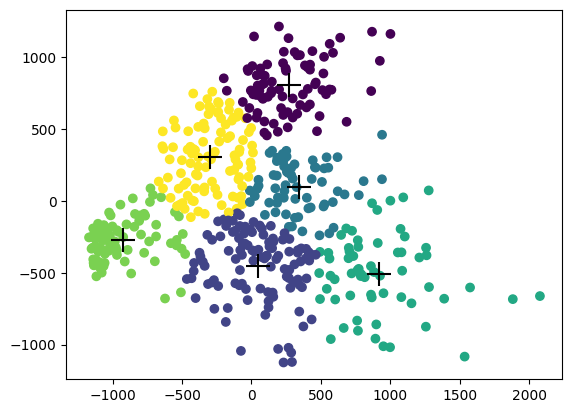

In [18]:
plt.scatter(pca_df_2d[0],	pca_df_2d[1], c=kmean.labels_)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='+', c='k', s=300)
plt.show()